In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
sns.set(font_scale=2)

In [11]:
%matplotlib inline

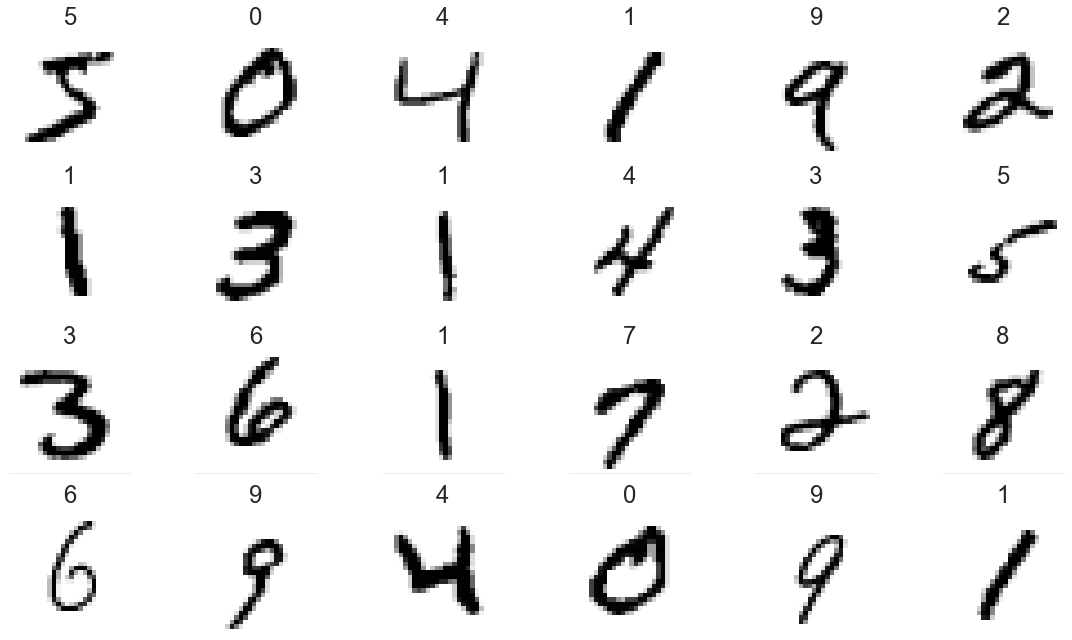

In [12]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [13]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_train = X_train.astype('float32') / 255

In [18]:
X_test = X_test.astype('float32') / 255

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train = to_categorical(y_train)

In [21]:
y_train.shape

(60000, 10)

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_train[16]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_test = to_categorical(y_test)

In [25]:
y_test.shape

(10000, 10)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
cnn = Sequential()

In [28]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [29]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [32]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [33]:
cnn.add(Flatten())

In [34]:
cnn.add(Dense(units=128, activation='relu'))

In [35]:
cnn.add(Dense(units=10, activation='softmax'))

In [36]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

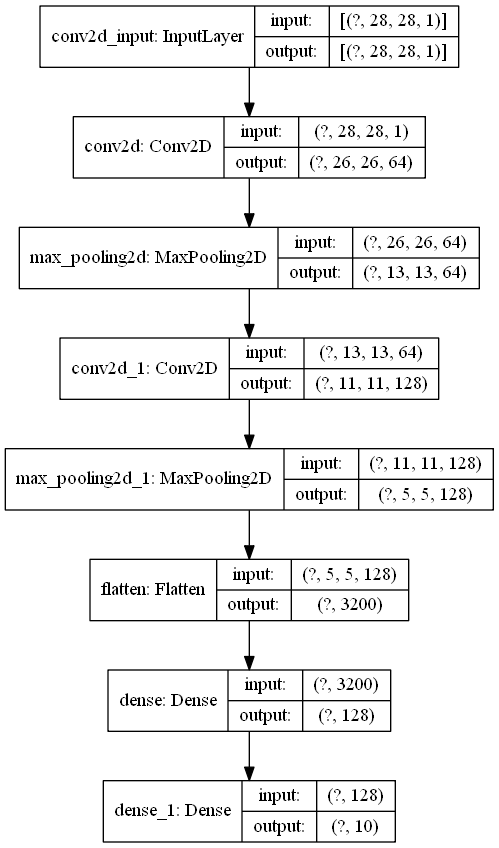

In [37]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [38]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
from tensorflow.keras.callbacks import TensorBoard
import time

tensorboard_callback = TensorBoard(log_dir=f'.\logs\mnist{time.time()}', histogram_freq=1, write_graph=True)

In [40]:
cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[tensorboard_callback])

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.1370 - acc: 0.9574 - val_loss: 0.0444 - val_acc: 0.9885
Epoch 2/10
54000/54000 [==============================] - 70s 1ms/sample - loss: 0.0421 - acc: 0.9868 - val_loss: 0.0356 - val_acc: 0.9883
Epoch 3/10
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.0293 - acc: 0.9908 - val_loss: 0.0351 - val_acc: 0.9890
Epoch 4/10
54000/54000 [==============================] - 67s 1ms/sample - loss: 0.0207 - acc: 0.9936 - val_loss: 0.0384 - val_acc: 0.9905
Epoch 5/10
54000/54000 [==============================] - 67s 1ms/sample - loss: 0.0149 - acc: 0.9952 - val_loss: 0.0409 - val_acc: 0.9890
Epoch 6/10
54000/54000 [==============================] - 68s 1ms/sample - loss: 0.0117 - acc: 0.9960 - val_loss: 0.0455 - val_acc: 0.9887
Epoch 7/10
54000/54000 [==============================] - 68s 1ms/sample - loss: 0.0101 - acc: 0.9966 - val_loss: 0.0

In [41]:
loss, accuracy = cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 437us/sample - loss: 0.0332 - acc: 0.9928


In [42]:
loss

0.03324587092657524

In [43]:
accuracy

0.9928

In [ ]:
predictions = cnn.predict(X_test)

In [ ]:
y_test[0]

In [ ]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

In [ ]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [ ]:
display_probabilities(predictions[321])

In [ ]:
display_probabilities(predictions[1530])

In [ ]:
display_probabilities(predictions[1569])

In [ ]:
display_probabilities(predictions[1878])

In [ ]:
display_probabilities(predictions[659])

In [ ]:
display_probabilities(predictions[625])